###DBSCAN

Download the data ("CC GENERAL.csv") from here: https://www.kaggle.com/arjunbhasin2013/ccdata

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [2]:
X = pd.read_csv('./CC GENERAL.csv')
X = X.drop('CUST_ID', axis = 1) #irrelevant id column

X.fillna(method ='ffill', inplace = True)
  
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [3]:
print(X.columns)
print(f"number of rows: {len(X)}")

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')
number of rows: 8950


In [4]:
X.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.394205,1733.143852,865.225790,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.616165,2895.063757,2376.929826,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.488256,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.096808,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,815.375602,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
#scale and normalize
scaler = StandardScaler()

X_s = scaler.fit_transform(X)
X_norm = pd.DataFrame(normalize(X_s))

In [6]:
pca = PCA(n_components = 2)
X_reduce = pca.fit_transform(X_norm)
X_reduce = pd.DataFrame(X_reduce)
X_reduce.columns = list([f'P{i}' for i in range(1, len(X_reduce.columns)+1)])

In [7]:
db_model = DBSCAN(eps = 0.05, min_samples = 10).fit(X_reduce)
labels = db_model.labels_

In [8]:
np.unique(labels)

array([-1,  0,  1], dtype=int64)

In [9]:
np.histogram(labels, bins=len(np.unique(labels)))

(array([  39, 8903,    8], dtype=int64),
 array([-1.        , -0.33333333,  0.33333333,  1.        ]))

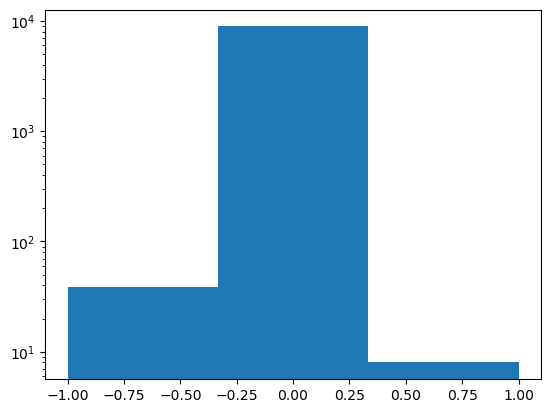

In [10]:
plt.hist(labels, bins=len(np.unique(labels)), log=True)
plt.show()

In [11]:
n_clusters = len(np.unique(labels))-1
anomaly = list(labels).count(-1)
print(f'Clusters: {n_clusters}')
print(f'Abnormal points: {anomaly}')

Clusters: 2
Abnormal points: 39


In [12]:
X_anomaly = X.iloc[np.argwhere(labels==-1).reshape((-1,))]
print(X_anomaly.head())

         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
86   7069.950386                1.0    1603.78           1445.14   
87   8181.251131                1.0    2258.01           1318.78   
109  6644.201651                1.0    4478.75           2721.59   
120  8504.876253                1.0    6724.26           4100.08   
468  6426.639738                1.0    4462.86           2816.46   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
86                   158.64   5626.004046                  1.0   
87                   939.23   5251.228934                  1.0   
109                 1757.16   7205.520805                  1.0   
120                 2624.18   1686.599777                  1.0   
468                 1646.40   4599.625146                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
86                     0.833333                          1.000000   
87                     0.750000                         

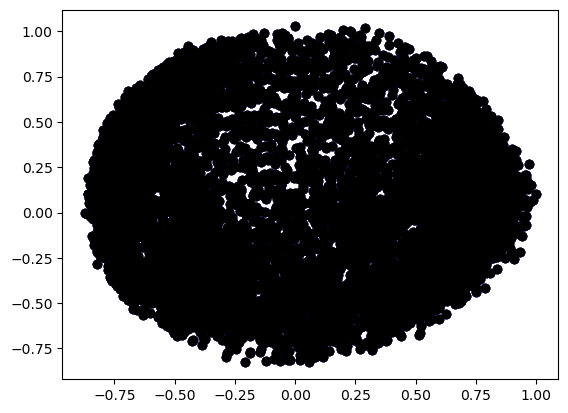

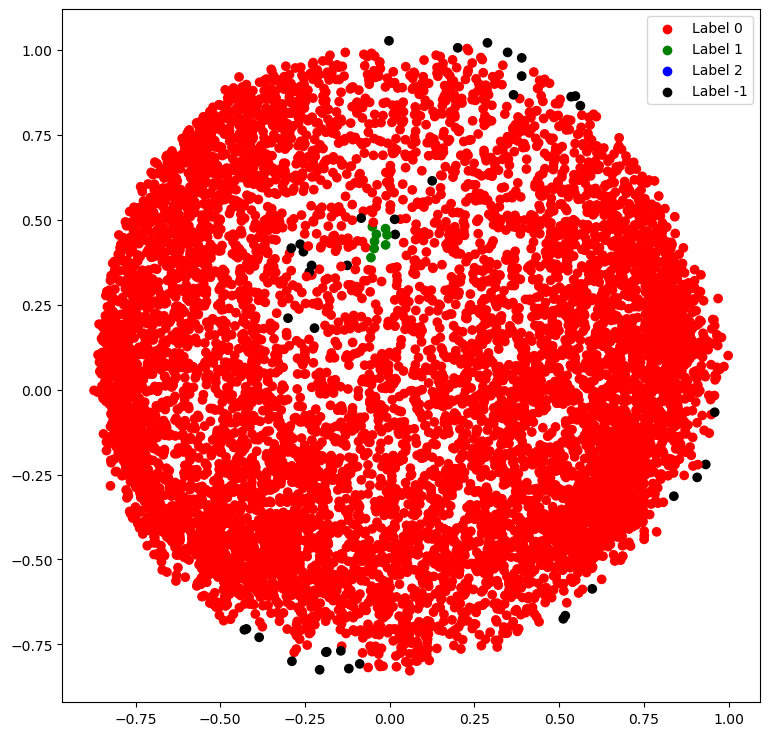

In [13]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]

r = plt.scatter(X_reduce['P1'], X_reduce['P2'], color ='r');
g = plt.scatter(X_reduce['P1'], X_reduce['P2'], color ='g');
b = plt.scatter(X_reduce['P1'], X_reduce['P2'], color ='b');
k = plt.scatter(X_reduce['P1'], X_reduce['P2'], color ='k');

plt.figure(figsize =(9, 9))
plt.scatter(X_reduce['P1'], X_reduce['P2'], c = cvec)

plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()